In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
def plot_bar(labels, values, title=None, xlabel=None, ylabel=None):
  plt.bar(labels, values)
  for i in range(len(values)):
    plt.annotate('{:.3f}'.format(values[i]), xy=(labels[i], values[i]), ha='center', va='bottom')
  if xlabel is not None: 
    plt.xlabel(xlabel)
  if ylabel is not None: 
    plt.ylabel(ylabel)
  if title is not None: 
    plt.title(title)

In [3]:
def plot_confusion_matrix(matrix):
  mask = np.triu(np.ones_like(matrix, dtype=bool),k=matrix.shape[0])

  cmap = sns.diverging_palette(250, 15, s=250, l=50, center="light", as_cmap=True)

  plt.figure(figsize=(10,10))
  sns.heatmap(matrix, mask=mask, center=0, annot=True, fmt='g', square=True, cmap=cmap)
  plt.yticks(rotation=45, ha='right')

  plt.show(); 

In [4]:
df_train = pd.read_csv('./classification_df_train.csv')

In [5]:
df_test = pd.read_csv('./classification_df_test.csv')

In [6]:
X_train = df_train.drop('Species', axis=1)
X_test = df_test.drop('Species', axis=1)
y_train = df_train['Species']
y_test = df_test['Species']

In [7]:
nb_model = GaussianNB()

In [8]:
nb_model.fit(X_train, y_train)

GaussianNB()

In [9]:
y_train_pred = nb_model.predict(X_train)

In [10]:
y_test_pred = nb_model.predict(X_test)

In [11]:
nb_accuracy_train = accuracy_score(y_train, y_train_pred)

In [12]:
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

In [13]:
conf_matrix_train_df = pd.DataFrame(conf_matrix_train, columns=y_train.unique(), index=pd.Series(y_train).unique())

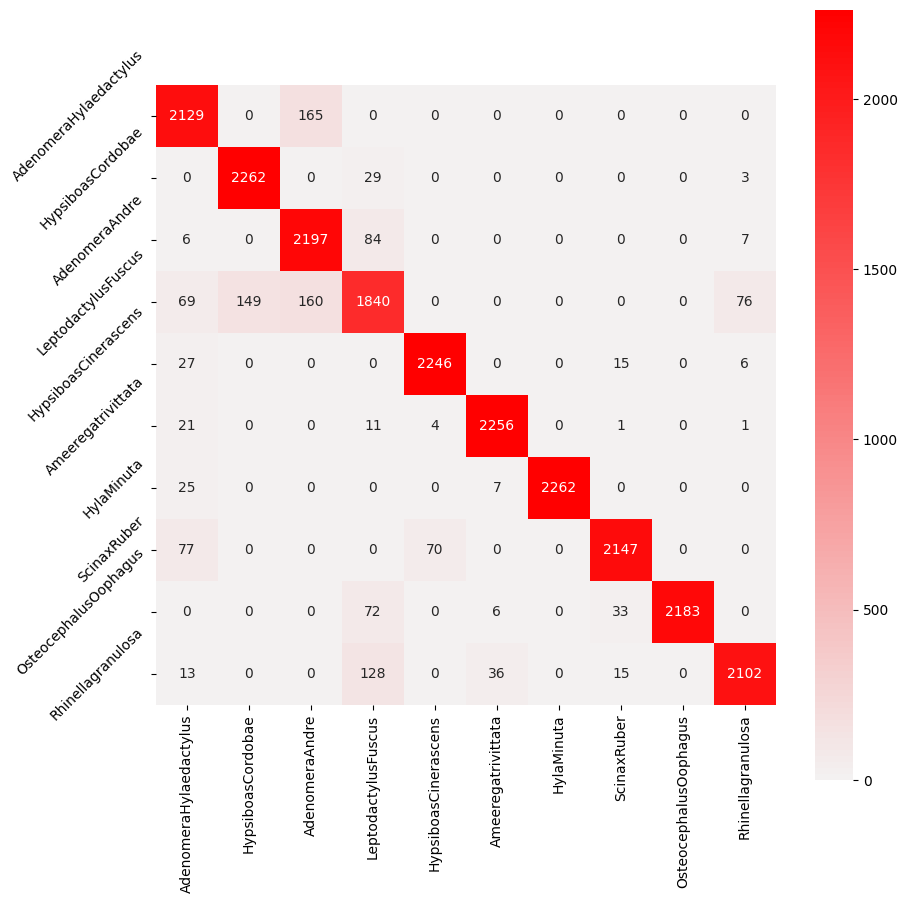

In [14]:
plot_confusion_matrix(conf_matrix_train_df)

In [15]:
nb_accuracy_test = accuracy_score(y_test, y_test_pred)

In [16]:
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

In [17]:
conf_matrix_test_df = pd.DataFrame(conf_matrix_test, columns=y_test.unique(), index=pd.Series(y_test).unique())

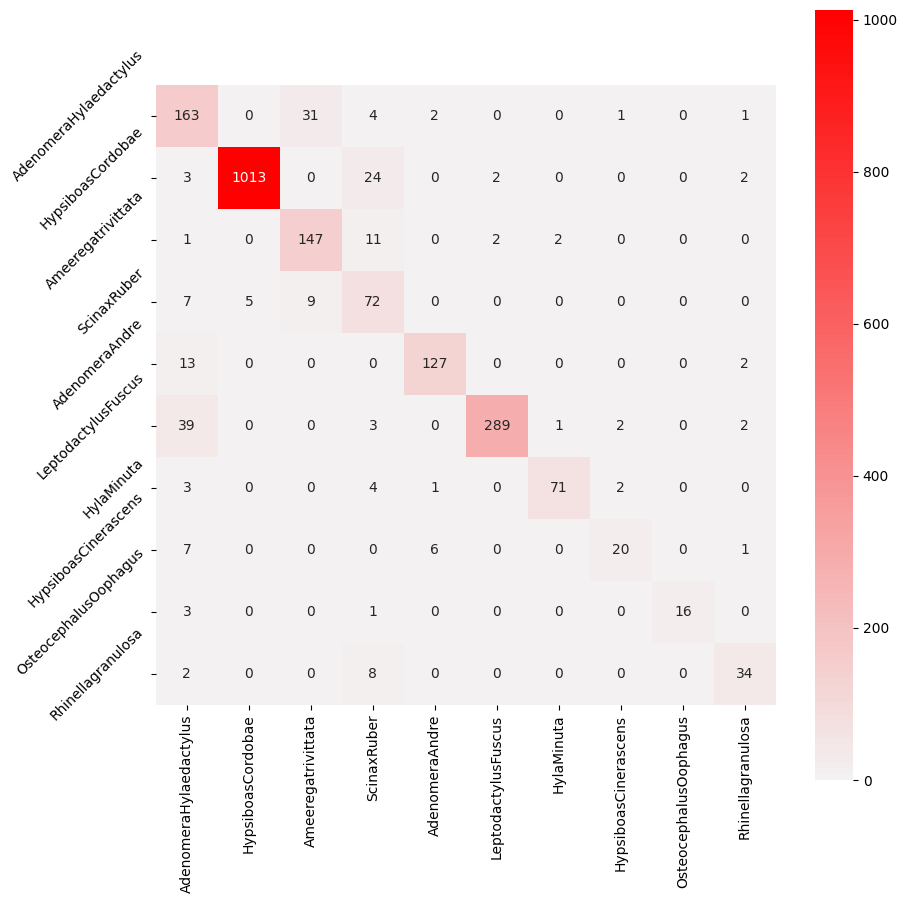

In [18]:
plot_confusion_matrix(conf_matrix_test_df)

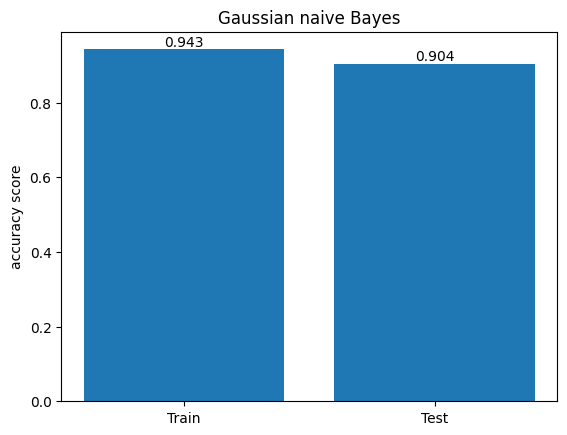

In [21]:
plot_bar(['Train', 'Test'], [nb_accuracy_train, nb_accuracy_test], title='Gaussian naive Bayes', ylabel='accuracy score')

In [19]:
import os
import pickle

In [20]:
output_directory = '../models/classification/'

models = [nb_model]
names = ['NB_model.pkl']
for model, name in zip(models, names):
  try:
    with open(os.path.join(output_directory, name), 'wb') as file:
      pickle.dump(model, file)
  except IOError as err:
    print('Error while exporting model \'{}\''.format(name.split('.')[0]))
    print(err)